In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np


# Step 1. Load the data and store it in a pandas DataFrame 
df = pd.read_csv("ICM317_Report_DataSet_2000Rows.csv")


2023-04-28 19:29:26.584897: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df

,FEAT_0,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
0,0.83,JOB_B,0,3,-0.83,2,3,0.33,0.54,6.0,4,0.4,2
1,0.61,JOB_B,1,1,-0.61,8,4,0.17,0.24,4.0,0,0.8,1
2,0.07,JOB_B,1,5,-0.07,4,4,0.10,0.97,10.0,8,0.5,1
3,0.27,JOB_A,1,5,-0.27,3,9,0.26,0.01,7.0,3,1.0,1
4,0.41,JOB_A,0,3,-0.41,7,0,0.62,0.50,7.0,4,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.01,JOB_A,2,3,-0.01,7,9,0.91,0.13,3.0,7,0.7,2
1996,0.10,JOB_A,1,3,-0.10,1,6,0.27,0.30,9.0,8,0.6,1
1997,0.97,JOB_C,0,1,-0.97,7,6,0.04,0.13,NaN,4,0.8,1
1998,0.44,JOB_A,1,5,-0.44,5,6,0.23,0.79,8.0,4,0.7,1


In [3]:
df.dropna(inplace=True)
df



,FEAT_0,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
0,0.83,JOB_B,0,3,-0.83,2,3,0.33,0.54,6.0,4,0.4,2
1,0.61,JOB_B,1,1,-0.61,8,4,0.17,0.24,4.0,0,0.8,1
2,0.07,JOB_B,1,5,-0.07,4,4,0.10,0.97,10.0,8,0.5,1
3,0.27,JOB_A,1,5,-0.27,3,9,0.26,0.01,7.0,3,1.0,1
4,0.41,JOB_A,0,3,-0.41,7,0,0.62,0.50,7.0,4,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.03,JOB_A,0,3,-0.03,7,8,0.00,0.10,7.0,4,0.4,1
1995,0.01,JOB_A,2,3,-0.01,7,9,0.91,0.13,3.0,7,0.7,2
1996,0.10,JOB_A,1,3,-0.10,1,6,0.27,0.30,9.0,8,0.6,1
1998,0.44,JOB_A,1,5,-0.44,5,6,0.23,0.79,8.0,4,0.7,1


In [4]:
corr_matrix = df.corr()
corr_matrix

,FEAT_0,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
FEAT_0,1.000000,-0.014117,-0.009803,-1.000000,-0.009189,0.029526,0.021286,0.021333,-0.046554,-0.037591,0.018545,0.266841
FEAT_2,-0.014117,1.000000,0.016482,0.014117,-0.047455,0.000906,0.009242,-0.023480,0.005816,-0.008403,-0.018006,0.300372
FEAT_3,-0.009803,0.016482,1.000000,0.009803,0.009351,0.008298,-0.035150,-0.024872,0.023960,-0.004324,0.005744,-0.238987
FEAT_4,-1.000000,0.014117,0.009803,1.000000,0.009189,-0.029526,-0.021286,-0.021333,0.046554,0.037591,-0.018545,-0.266841
FEAT_5,-0.009189,-0.047455,0.009351,0.009189,1.000000,0.013393,0.048608,-0.032599,-0.012739,0.032354,-0.043057,0.022107
FEAT_6,0.029526,0.000906,0.008298,-0.029526,0.013393,1.000000,0.002943,-0.035289,0.004962,0.000220,-0.039262,0.466653
FEAT_7,0.021286,0.009242,-0.035150,-0.021286,0.048608,0.002943,1.000000,0.001588,0.017163,-0.046504,-0.010545,0.110684
FEAT_8,0.021333,-0.023480,-0.024872,-0.021333,-0.032599,-0.035289,0.001588,1.000000,0.020376,0.028068,-0.020569,0.253716
FEAT_9,-0.046554,0.005816,0.023960,0.046554,-0.012739,0.004962,0.017163,0.020376,1.000000,-0.024693,-0.003726,0.001766
FEAT_10,-0.037591,-0.008403,-0.004324,0.037591,0.032354,0.000220,-0.046504,0.028068,-0.024693,1.000000,0.015313,0.204521


In [5]:
df.describe

#for random forrest:
# Remove least important feature (feat1)
# df.drop('FEAT_1', axis=1, inplace=True)
# df.drop('FEAT_9', axis=1, inplace=True)
# df.drop('FEAT_5', axis=1, inplace=True)
# df.drop('FEAT_3', axis=1, inplace=True)

#If you uncomment the code above, you can maintain an accuracy rate of 75% or higher.
# However, if you comment out the lines below, the accuracy rate may decrease below 75%.
##df.drop('FEAT_2', axis=1, inplace=True)
#df.drop('FEAT_7', axis=1, inplace=True)
#df.drop('FEAT_10', axis=1, inplace=True)


#for neural network:
# Remove least important feature (feat1)
# df.drop('FEAT_1', axis=1, inplace=True)
# df.drop('FEAT_9', axis=1, inplace=True)
# df.drop('FEAT_5', axis=1, inplace=True)

#If you uncomment the code above, you can maintain an accuracy rate of 75% or higher.
# However, if you comment out the lines below, the accuracy rate may decrease below 75%.

#df.drop('FEAT_2', axis=1, inplace=True)
#df.drop('FEAT_3', axis=1, inplace=True)
#df.drop('FEAT_7', axis=1, inplace=True)
#df.drop('FEAT_10', axis=1, inplace=True)



<bound method NDFrame.describe of       FEAT_0 FEAT_1  FEAT_2  FEAT_3  FEAT_4  FEAT_5  FEAT_6  FEAT_7  FEAT_8  \
0       0.83  JOB_B       0       3   -0.83       2       3    0.33    0.54   
1       0.61  JOB_B       1       1   -0.61       8       4    0.17    0.24   
2       0.07  JOB_B       1       5   -0.07       4       4    0.10    0.97   
3       0.27  JOB_A       1       5   -0.27       3       9    0.26    0.01   
4       0.41  JOB_A       0       3   -0.41       7       0    0.62    0.50   
...      ...    ...     ...     ...     ...     ...     ...     ...     ...   
1994    0.03  JOB_A       0       3   -0.03       7       8    0.00    0.10   
1995    0.01  JOB_A       2       3   -0.01       7       9    0.91    0.13   
1996    0.10  JOB_A       1       3   -0.10       1       6    0.27    0.30   
1998    0.44  JOB_A       1       5   -0.44       5       6    0.23    0.79   
1999    0.67  JOB_A       0       2   -0.67       3       3    0.71    0.20   

      FEAT_9  FEA

In [6]:
# Step 2. Encode the categorical features using LabelEncoder uncomment
le = LabelEncoder()
df['FEAT_1'] = le.fit_transform(df['FEAT_1'])

df

,FEAT_0,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
0,0.83,1,0,3,-0.83,2,3,0.33,0.54,6.0,4,0.4,2
1,0.61,1,1,1,-0.61,8,4,0.17,0.24,4.0,0,0.8,1
2,0.07,1,1,5,-0.07,4,4,0.10,0.97,10.0,8,0.5,1
3,0.27,0,1,5,-0.27,3,9,0.26,0.01,7.0,3,1.0,1
4,0.41,0,0,3,-0.41,7,0,0.62,0.50,7.0,4,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.03,0,0,3,-0.03,7,8,0.00,0.10,7.0,4,0.4,1
1995,0.01,0,2,3,-0.01,7,9,0.91,0.13,3.0,7,0.7,2
1996,0.10,0,1,3,-0.10,1,6,0.27,0.30,9.0,8,0.6,1
1998,0.44,0,1,5,-0.44,5,6,0.23,0.79,8.0,4,0.7,1


In [7]:
# Step 3. Split the data into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Step 4. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [8]:
# Step 5. Apply a Standard Scaler over the Features of the Training Set (Fit and Transform).
# Use your fitted scaler over the Test Data.
# Remember Fit and Transform on the Training Set and Transform Only on the Test Set.

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
X_train

array([[-1.05493092,  0.05359782, -1.45306187, ..., -1.20991169,
         0.61355088,  1.64127777],
       [-0.6420224 , -0.85470663, -0.05075235, ..., -0.59107959,
         1.5630109 ,  0.9606696 ],
       [-0.84847666,  0.05359782, -1.45306187, ...,  0.0277525 ,
        -0.96888249, -0.40054675],
       ...,
       [-1.05493092,  0.96190228, -0.05075235, ...,  1.57483274,
        -0.65239582, -1.76176309],
       [-0.77965857,  0.05359782,  1.35155717, ...,  0.6465846 ,
         1.5630109 ,  0.62036551],
       [ 2.24833725,  1.87020673,  1.35155717, ..., -1.51932774,
        -1.28536917, -0.06024266]])

In [10]:
y_train

array([0, 0, 1, ..., 0, 1, 1])

Random Forest Classifier:


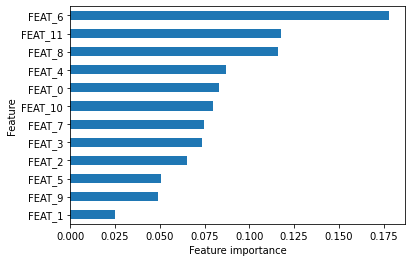

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       739
           2       1.00      1.00      1.00       266
           3       1.00      1.00      1.00        25

    accuracy                           1.00      1271
   macro avg       1.00      1.00      1.00      1271
weighted avg       1.00      1.00      1.00      1271

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.62      0.76       109
           1       0.77      0.98      0.87       305
           2       0.76      0.59      0.67       111
           3       1.00      0.05      0.10        20

    accuracy                           0.80       545
   macro avg       0.87      0.56      0.60       545
weighted avg       0.82      0.80      0.77       545



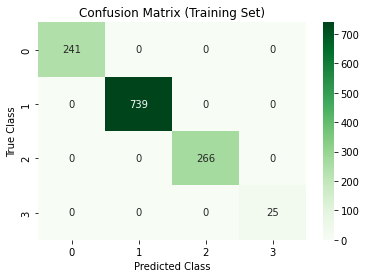

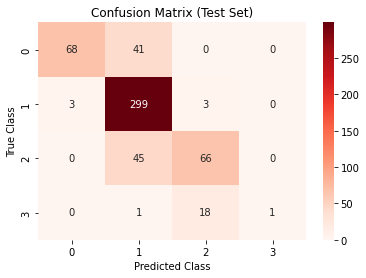

In [11]:
from sklearn.metrics import classification_report

# Step 6. Train a Random Forest Classifier on the Training Set and Evaluate Performance on the Test Set
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Print feature importances
feat_importances = pd.Series(clf.feature_importances_, index=df.columns[:-1])
feat_importances.sort_values().plot(kind='barh')
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# Classification report for training set
y_train_pred = clf.predict(X_train)
print("Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

# Classification report for test set
y_test_pred = clf.predict(X_test)
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure()
sns.heatmap(cm_train, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure()
sns.heatmap(cm_test, annot=True, cmap="Reds", fmt="d")
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


Neural Network

Epoch 1/100
36/36 [==============================] - 1s 6ms/step - loss: 1.1332 - accuracy: 0.4934 - val_loss: 1.0506 - val_accuracy: 0.5703
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.9220 - accuracy: 0.6177 - val_loss: 0.9243 - val_accuracy: 0.6016
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.7967 - accuracy: 0.6877 - val_loss: 0.8165 - val_accuracy: 0.6719
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.7507 - val_loss: 0.7238 - val_accuracy: 0.7109
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.7760 - val_loss: 0.6678 - val_accuracy: 0.7266
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.7935 - val_loss: 0.6154 - val_accuracy: 0.7812
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.8049 - val_loss: 0.5951 - val_accuracy: 0.7812
Epoch 8/100
3

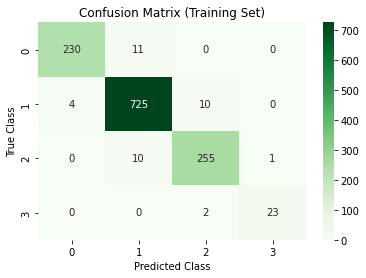

18/18 [==============================] - 0s 677us/step
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       109
           1       0.91      0.94      0.93       305
           2       0.82      0.85      0.83       111
           3       0.70      0.35      0.47        20

    accuracy                           0.89       545
   macro avg       0.83      0.75      0.78       545
weighted avg       0.88      0.89      0.88       545



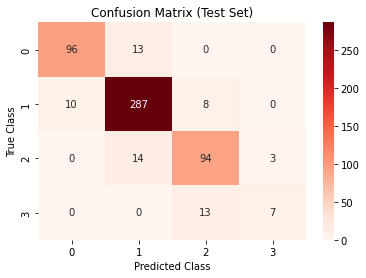

Accuracy (Test Set): 0.8880733847618103
Precision (Test Set): 0.8342661051399549
Recall (Test Set): 0.7546410995895881
F1-score (Test Set): 0.7797126074304543


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Step 6. Train a neural network on the Training Set and Evaluate Performance on the Test Set

# Create a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy_test = model.evaluate(X_test, y_test)

# Evaluation metrics for training set
y_train_pred = np.argmax(model.predict(X_train), axis=-1)
print("Accuracy (Training Set):", accuracy_score(y_train, y_train_pred))
print("Precision (Training Set):", precision_score(y_train, y_train_pred, average='macro'))
print("Recall (Training Set):", recall_score(y_train, y_train_pred, average='macro'))
print("F1-score (Training Set):", f1_score(y_train, y_train_pred, average='macro'))

# Confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure()
sns.heatmap(cm_train, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Classification report and confusion matrix for test set
y_test_pred = np.argmax(model.predict(X_test), axis=-1)
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure()
sns.heatmap(cm_test, annot=True, cmap="Reds", fmt="d")
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Evaluation metrics for test set
print("Accuracy (Test Set):", accuracy_test)
print("Precision (Test Set):", precision_score(y_test, y_test_pred, average='macro'))
print("Recall (Test Set):", recall_score(y_test, y_test_pred, average='macro'))
print("F1-score (Test Set):", f1_score(y_test, y_test_pred, average='macro'))


Logistic Regression Classifier

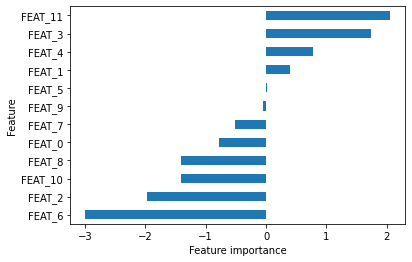

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       241
           1       0.81      0.87      0.84       739
           2       0.72      0.67      0.69       266
           3       0.92      0.44      0.59        25

    accuracy                           0.79      1271
   macro avg       0.82      0.68      0.72      1271
weighted avg       0.79      0.79      0.79      1271

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       109
           1       0.77      0.87      0.82       305
           2       0.69      0.65      0.67       111
           3       0.60      0.15      0.24        20

    accuracy                           0.75       545
   macro avg       0.70      0.57      0.60       545
weighted avg       0.74      0.75      0.74       545



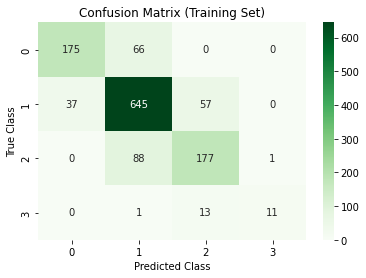

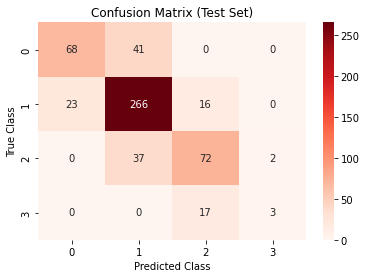

Accuracy: 0.7504587155963303
Precision: 0.7015557117301304
Recall: 0.5736582517997016
F1-score: 0.6015973292244479


In [13]:
from sklearn.linear_model import LogisticRegression

# Step 6. Train a Logistic Regression Classifier on the Training Set and Evaluate Performance on the Test Set
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Print feature importances
feat_importances = pd.Series(clf.coef_[0], index=df.columns[:-1])
feat_importances.sort_values().plot(kind='barh')
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# Evaluate performance on training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print("Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure()
sns.heatmap(cm_train, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Plot the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure()
sns.heatmap(cm_test, annot=True, cmap="Reds", fmt="d")
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Compute the evaluation metrics for the test set
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='macro'))
print("Recall:", recall_score(y_test, y_test_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_test_pred, average='macro'))
